In [1]:
#1. Split Dataset
#2. Model Pipelines
#3. Declare Hyperparameters
#4. Cross Validation
#5. Select Winner

In [1]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

pd.options.mode.chained_assignment = None

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
import sklearn

In [3]:
import sklearn
from sklearn.linear_model import ElasticNet, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
df=pd.read_csv('analytical_base_table.csv')
df.head()
#print(df.shape)

,tx_price,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recesssion,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,exterior_walls_missing,exterior_walls_other,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Shake Shingle,roof_other,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,0,0.0,107,9,30,19,89,6,47,58,33,65,84,234,81,9.0,3,0,1,0,27.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,216500,1,1,612,0,1.0,105,15,6,13,87,2,26,14,39,73,69,169,51,3.0,3,0,0,41,9.0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,279900,1,1,615,0,0.0,183,13,31,30,101,10,74,62,28,15,86,216,74,8.0,3,0,1,49,24.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,379900,1,1,618,33541,0.0,198,9,38,25,127,11,72,83,36,25,91,265,92,9.0,3,0,0,5,27.0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4,340000,1,1,634,0,0.0,149,7,22,20,83,10,50,73,37,20,75,88,30,9.0,3,0,0,10,27.0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [3]:
#Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [4]:
# create seperate
y=df.tx_price

#Create sepeate object for input features
X = df.drop('tx_price', axis=1)

In [5]:
#Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [6]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

1490 373 1490 373


In [9]:
#5.2 Model Pipelines
#Preprocessing
Scalar=(x-Xmean)/Sd

NameError: name 'x' is not defined

In [9]:
X_train.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recesssion,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,exterior_walls_missing,exterior_walls_other,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Shake Shingle,roof_other,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000,1490.000000
mean,3.434228,2.579195,2322.785235,12746.659732,0.878523,39.495973,4.388591,5.004698,5.185906,39.561074,3.361745,22.909396,15.770470,38.508725,69.471141,65.012752,464.265772,139.610067,6.510067,2.779195,0.092617,0.265772,24.343624,17.940268,0.359732,0.024161,0.059060,0.065772,0.268456,0.065772,0.119463,0.037584,0.069799,0.641611,0.189262,0.030872,0.068456,0.419463,0.580537
std,1.072914,0.930476,1297.101677,34805.545024,0.326790,46.985862,4.498340,8.441995,7.442707,52.334853,4.693709,25.724463,17.999282,6.615223,19.865080,17.092542,227.249819,71.510905,1.975224,0.517235,0.289993,0.441892,21.209025,6.452059,0.480083,0.153601,0.235817,0.247966,0.443305,0.247966,0.324442,0.190252,0.254893,0.479688,0.391848,0.173030,0.252612,0.493637,0.493637
min,1.000000,1.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,1351.000000,1542.000000,1.000000,6.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,59.000000,53.250000,321.000000,94.000000,5.000000,3.000000,0.000000,0.000000,6.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,1913.500000,6183.000000,1.000000,21.000000,3.000000,2.000000,3.000000,20.000000,2.000000,15.000000,10.000000,38.000000,74.000000,66.000000,426.000000,125.000000,7.000000,3.000000,0.000000,0.000000,20.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,4.000000,3.000000,3014.750000,11761.000000,1.000000,56.000000,7.000000,6.000000,6.000000,50.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,572.000000,169.000000,8.000000,3.000000,0.000000,1.000000,38.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5.000000,6.000000,7842.000000,436471.000000,1.000000,266.000000,24.000000,53.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,1.000000,1.000000,114.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Standardize X_train
# mean =0, std=1
X_train_new = (X_train -X_train.mean())/X_train.std()

In [11]:
X_train_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recesssion,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,exterior_walls_missing,exterior_walls_other,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Shake Shingle,roof_other,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03,1.490000e+03
mean,-1.902281e-16,-4.254613e-17,7.663519e-17,3.911860e-17,9.746119e-17,1.409760e-16,1.621373e-16,2.827995e-16,8.946050e-18,2.315448e-17,-2.132895e-16,1.022299e-16,2.151243e-16,-3.534831e-16,-1.768906e-16,-5.603273e-17,8.032352e-17,-1.070732e-16,1.852359e-16,9.239440e-18,-1.969342e-16,-7.004092e-18,-3.012132e-17,-2.877266e-16,1.457447e-16,1.207088e-17,4.798548e-17,1.039437e-16,1.359092e-16,-2.747988e-16,2.615358e-17,1.184362e-16,-1.776357e-16,1.157910e-16,2.772577e-16,-6.337213e-17,1.599764e-16,8.941393e-17,-8.941393e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.268801e+00,-1.697190e+00,-1.405276e+00,-3.662250e-01,-2.688343e+00,-8.405927e-01,-9.756023e-01,-5.928336e-01,-6.967768e-01,-7.559221e-01,-7.162235e-01,-8.905685e-01,-8.761722e-01,-2.495566e+00,-2.943413e+00,-3.511049e+00,-1.655736e+00,-1.532774e+00,-2.789591e+00,-3.439819e+00,-3.193783e-01,-6.014412e-01,-1.147796e+00,-2.315581e+00,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-6.055792e-01,-2.652453e-01,-3.682115e-01,-1.975485e-01,-2.738352e-01,-1.337558e+00,-4.829980e-01,-1.784225e-01,-2.709939e-01,-8.497402e-01,-1.176040e+00
25%,-4.047185e-01,-6.224713e-01,-7.491974e-01,-3.219217e-01,3.717266e-01,-7.128947e-01,-7.532980e-01,-5.928336e-01,-6.967768e-01,-6.412758e-01,-7.162235e-01,-7.350745e-01,-6.539411e-01,-8.327346e-01,-5.271130e-01,-6.881804e-01,-6.304329e-01,-6.378058e-01,-7.645042e-01,4.268957e-01,-3.193783e-01,-6.014412e-01,-8.648971e-01,-9.206779e-01,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-6.055792e-01,-2.652453e-01,-3.682115e-01,-1.975485e-01,-2.738352e-01,-1.337558e+00,-4.829980e-01,-1.784225e-01,-2.709939e-01,-8.497402e-01,-1.176040e+00
50%,5.273226e-01,4.522474e-01,-3.155383e-01,-1.885809e-01,3.717266e-01,-3.936498e-01,-3.086896e-01,-3.559228e-01,-2.936977e-01,-3.737676e-01,-2.901213e-01,-3.074659e-01,-3.205944e-01,-7.690215e-02,2.279809e-01,5.775901e-02,-1.683864e-01,-2.043054e-01,2.480391e-01,4.268957e-01,-3.193783e-01,-6.014412e-01,-2.048007e-01,9.257749e-03,-7.493115e-01,-1.572980e-01,-2.504503e-01,-2.652453e-01,-6.055792e-01,-2.652453e-01,-3.682115e-01,-1.975485e-01,-2.738352e-01,7.471295e-01,-4.829980e-01,-1.784225e-01,-2.709939e-01,-8.497402e-01,8.497402e-01
75%,5.273226e-01,4.522474e-01,5.334699e-01,-2.831904e-02,3.717266e-01,3.512552e-01,5.805274e-01,1.178989e-01,1.093814e-01,1.994641e-01,3.490321e-01,4.700041e-01,2.905410e-01,6.789303e-01,7.313768e-01,

In [12]:
X_test_new = (X_test- X_train.mean())/X_train.std()

In [13]:
X_test_new.describe()

,beds,baths,sqft,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,two_and_two,during_recesssion,property_age,school_score,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,exterior_walls_missing,exterior_walls_other,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Shake Shingle,roof_other,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,-0.117360,-0.080790,-0.090918,-0.032233,0.010753,0.091066,0.141283,0.056925,0.109381,0.132152,0.048019,0.107741,0.034946,0.072238,-0.100643,0.010077,-0.063649,-0.055431,-0.036315,0.121083,0.050419,-0.025074,0.012619,0.032942,0.066008,0.052152,-0.045811,-0.027385,-0.025002,-0.005761,-0.004625,-0.042540,0.010151,0.009385,-0.004068,-0.038975,0.004943,0.111555,-0.111555
std,0.958651,0.989343,1.001612,1.034313,0.988393,1.003586,0.996496,1.034407,1.077763,1.121003,1.013148,1.018536,0.922012,1.020545,0.949393,0.944916,0.889783,0.908482,1.042742,0.894708,1.068412,0.987285,0.972418,1.011310,1.017999,1.150338,0.910017,0.951364,0.987522,0.990833,0.995547,0.890424,1.017973,0.998184,0.997762,0.888023,1.009418,1.012934,1.012934
min,-2.268801,-1.697190,-1.261108,-0.366225,-2.688343,-0.840593,-0.975602,-0.592834,-0.696777,-0.755922,-0.716224,-0.890568,-0.876172,-1.739734,-2.842734,-2.691978,-1.396110,-1.295048,-2.789591,-3.439819,-0.319378,-0.601441,-1.147796,-2.315581,-0.749312,-0.157298,-0.250450,-0.265245,-0.605579,-0.265245,-0.368211,-0.197548,-0.273835,-1.337558,-0.482998,-0.178422,-0.270994,-0.849740,-1.176040
25%,-0.404719,-0.622471,-0.803935,-0.324824,0.371727,-0.627763,-0.753298,-0.474378,-0.562417,-0.564845,-0.716224,-0.657327,-0.542826,-0.681568,-0.678132,-0.702807,-0.652435,-0.665774,-0.764504,0.426896,-0.319378,-0.601441,-0.912047,-0.920678,-0.749312,-0.157298,-0.250450,-0.265245,-0.605579,-0.265245,-0.368211,-0.197548,-0.273835,-1.337558,-0.482998,-0.178422,-0.270994,-0.849740,-1.176040
50%,-0.404719,-0.622471,-0.386851,-0.266126,0.371727,-0.287235,-0.086385,-0.355923,-0.293698,-0.259121,-0.290121,-0.229719,-0.265037,-0.076902,0.076962,0.057759,-0.243194,-0.246257,0.248039,0.426896,-0.319378,-0.601441,-0.157651,0.009258,-0.749312,-0.157298,-0.250450,-0.265245,-0.605579,-0.265245,-0.368211,-0.197548,-0.273835,0.747130,-0.482998,-0.178422,-0.270994,-0.849740,0.849740
75%,0.527323,0.452247,0.306233,-0.062883,0.371727,0.500236,0.580527,0.117899,0.243741,0.333218,0.349032,0.586625,0.346099,0.678930,0.630698,0.759820,0.267258,0.271147,0.754311,0.426896,-0.319378,1.661557,0.691044,0.939193,1.333663,-0.157298,-0.250450,-0.265245,1.650203,-0.265245,-0.368211,-0.197548,-0.273835,0.747130,-0.482998,-0.178422,-0.270994,1.176040,0.849740
max,1.459364,3.676403,4.127830,12.149022,0.371727,4.820685,3.915091,5.803759,5.349410,5.740705,6.740566,5.912295,4.012912,4.155760,1.536810,1.988426,4.790914,5.375263,1.766854,2.360253,3.128982,1.661557,3.284280,1.869129,1.333663,6.353092,3.990129,3.767565,1.650203,3.767565,2.714008,5.058652,3.649381,0.747130,2.069013,5.600914,3.687643,1.176040,0.849740


In [14]:
#Function for creating model pipeline
from sklearn.pipeline import make_pipeline

#for standardisation
from sklearn.preprocessing import StandardScaler

In [15]:
#create a pipeline for Lasso Regression
make_pipeline(StandardScaler(), Lasso(random_state=123))

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [16]:
#Create pipelines dictionary

pipelines = {
    'lasso':make_pipeline(StandardScaler(), Lasso(random_state=123)), 
    'ridge':make_pipeline(StandardScaler(), Ridge(random_state=123)), 
    'enet' :make_pipeline(StandardScaler(),  ElasticNet(random_state=123))
}

In [17]:
pipelines['rf']= make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123))
pipelines['gb']= make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))

In [18]:
for key, value in pipelines.items():
    print(key, type(value))

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [22]:
#5.3 Declare Hyperparameters.
pipelines['Lasso'].get_params()

{'memory': None,
 'steps': [('standardscaler',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=123,
      selection='cyclic', tol=0.0001, warm_start=False))],
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'lasso': Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
    normalize=False, positive=False, precompute=False, random_state=123,
    selection='cyclic', tol=0.0001, warm_start=False),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'lasso__alpha': 1.0,
 'lasso__copy_X': True,
 'lasso__fit_intercept': True,
 'lasso__max_iter': 1000,
 'lasso__normalize': False,
 'lasso__positive': False,
 'lasso__precompute': False,
 'lasso__random_state': 123,
 'lasso__selection': 'cyclic',
 'lasso__tol': 0.0001,
 'lasso__warm_start': False}

In [19]:
#lasso hyperparameters
lasso_hyperparameters={
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

#Ridge Hyperparameters
ridge_hyperparameters={
    'ridge__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]
}

In [20]:
#Elastic Net Hyperparameters
#l1_ratio=1 Lasso Regression
#l1_ratio=0 Ridge Regression
enet_hyperparameters={
    'elasticnet__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]
}

In [21]:
#random forest Hyperparameters
rf_hyperparameters={
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features' : ['auto', 'sqrt', 0.33]
}

In [22]:
#Boosted Trees Hyperparameters
gb_hyperparameters={
    'gradientboostingregressor__n_estimators' : [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth' : [1, 3, 5]
}

In [23]:
#create Hyperparameters dictionary
hyperparameters = {
    'rf': rf_hyperparameters,
    'gb':gb_hyperparameters,
    'lasso':lasso_hyperparameters,
    'ridge':ridge_hyperparameters,
    'enet':enet_hyperparameters
}

In [24]:
for key in ['enet', 'gb', 'ridge', 'rf', 'lasso']:
    if key in hyperparameters:
        if type(hyperparameters[key]) is dict:
            print(key, 'was found i hyperparameters')
        else:
                print(key, 'was found i hyperparameters, but it is not grid')
        else:
                    print(key, 'not found')

SyntaxError: invalid syntax (<ipython-input-24-7b9f79af8f0a>, line 7)

In [ ]:
#5.4 Cross Validation

In [25]:
from sklearn.model_selection import GridSearchCV

In [27]:
model = GridSearchCV(pipelines['lasso'], hyperparameters['lasso'], cv=10, n_jobs=-1)

In [28]:
type(model)

sklearn.model_selection._search.GridSearchCV

In [30]:
model.fit(X_train, y_train)

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=123,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'lasso__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [32]:
fitted_models = {}

#Loop through model pipelines tuning each one and saving it to fitted_model
for name, pipeline in pipelines.items():
    #create cross validation object from pipeline and hyperparameters
    model= GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    #fit model in X_train y_train
    model.fit(X_train, y_train)
    
    #store model in fitted_model
    fitted_models[name]= model
    
    #print (name) has been fitted
    print(name, 'has been fitted')

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


lasso has been fitted


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


ridge has been fitted


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


enet has been fitted


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


rf has been fitted


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


gb has been fitted


In [33]:
for key, value in fitted_models.items():
    print(key, type(value))

lasso <class 'sklearn.model_selection._search.GridSearchCV'>
ridge <class 'sklearn.model_selection._search.GridSearchCV'>
enet <class 'sklearn.model_selection._search.GridSearchCV'>
rf <class 'sklearn.model_selection._search.GridSearchCV'>
gb <class 'sklearn.model_selection._search.GridSearchCV'>


In [35]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted')
    except NotFittedError as e:

        print(repr(e))

lasso has been fitted
ridge has been fitted
enet has been fitted
rf has been fitted
gb has been fitted


C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
 

In [36]:
#Rsquared Scores by default
for name, model in fitted_models.items():
    print(name, model.best_score_)

lasso 0.3082941360558257
ridge 0.31624188589803787
enet 0.3425771964488258
rf 0.4811214691145931
gb 0.48758872782320123


In [37]:
from sklearn.metrics import r2_score

In [38]:
from sklearn.metrics import mean_absolute_error

In [39]:
#Display fitted random forest object
fitted_models['rf']

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('randomforestregressor', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
  ...rs='warn', n_jobs=None,
           oob_score=False, random_state=123, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'randomforestregressor__n_estimators': [100, 200], 'randomforestregressor__max_features': ['auto', 'sqrt', 0.33]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [40]:
#predict  set using fitted random forest
pred = fitted_models['rf'].predict(X_test)

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [41]:
#Calculate and print R sq and MAE
print('R^2', r2_score(y_test, pred))
print('MAE', mean_absolute_error(y_test, pred))

R^2 0.5697250798205048
MAE 68069.19714477212


In [42]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print(name)
    print('-----------------')
    print('R^2', r2_score(y_test, pred))
    print('MAE', mean_absolute_error(y_test, pred))
    print()

lasso
-----------------
R^2 0.40847826674756893
MAE 85072.85431122624

ridge
-----------------
R^2 0.4089536325205235
MAE 85012.16698568306

enet
-----------------
R^2 0.40496183211394365
MAE 86325.6160513484

rf
-----------------
R^2 0.5697250798205048
MAE 68069.19714477212

gb
-----------------
R^2 0.5403175800869549
MAE 70647.2441330551



C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
 

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


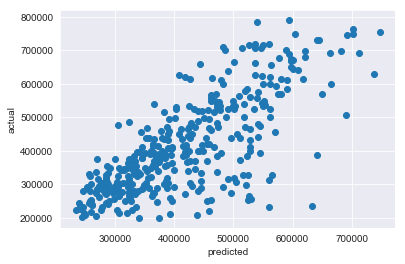

In [43]:
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [44]:
type(fitted_models['rf'])

sklearn.model_selection._search.GridSearchCV

In [46]:
type(fitted_models['rf'].best_estimator_)

sklearn.pipeline.Pipeline

In [47]:
import pickle

In [48]:
with open('final_model.pk1', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)